# Calibration of Motor Drift

The optical elements of the PSG and PSA may not be plano-paralel elements (specially polarizers), and they may not be perfectly normal to the beam. When they are rotated, a small drift in the beam is produced (up to ~100 um). While this movement is negligible when using photodiodes/spectrometer, it must be taken into account when using the imaging configuration.

In this notebook, the drift will be measured and characterized.

## Preparation

Start by loading the required modules

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from py_lab.setups.polarimeter import Polarimeter
from py_lab.setups.polarimeter_calibration import Measure_Motor_Drift, Analyze_Motor_Drift

## Folder to save data

In [4]:
%cd D:\Experimentos\Calibracion\Motor_Drift_22_07_20

D:\Experimentos\Calibracion\Motor_Drift_22_07_20


## Initialize Polarimeter Object

Use_daca as false to measure with the camera, even though we use Reference PHD

In [5]:
pol = Polarimeter(use_daca=False)

Background cleared


In [6]:
pol.Open()

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 6
Background cleared
Background cleared
Background cleared
The value of the property resolution is [2560 1920].


In [8]:
pol.Ready()

## Camera properties and Background

We have to set the correct properties for the camera (gain, exposure time, Region of Interest) and then get the background to substract it to all images.

In [10]:
pol.camera.Set_Property("Pixelclock", 33)

Background cleared


In [11]:
pol.camera.Set_Property("Framerate", 4.84)

In [12]:
pol.camera.Set_Property("Exposure", 0.308)

Background cleared


In [13]:
pol.camera.Set_ROI(width=1240, height=1560, x=436, y=212)

The value of the property resolution is [2560 1920].


In [7]:
pol.camera.Start_Live(view=False)

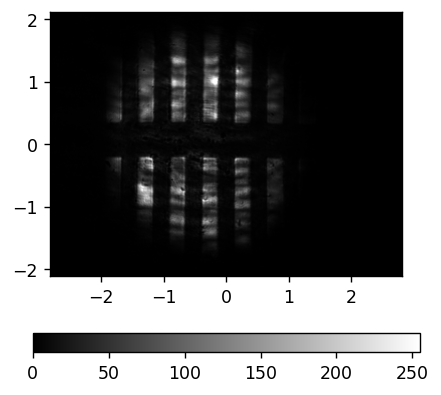

In [9]:
_ = pol.camera.Get_Image(draw=True, rest_background=False)

In [ ]:
pol.camera.Stop_Live()

We have to measure and record the signal measured by the camera with the illumination diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [14]:
# Apagar diodo
pol.daca.Get_Signal(is_background=True, verbose=True)
_ = pol.camera.Get_Image(is_background=True, stadistics=True)

Reference:  -0.01302698925
Signal:  -0.44520722655
Staistics of the image:
  - Max:  2.0.
  - Min:  0.0.
  - Mean: 0.0
  - Std:  0.0


## Make the measurements

We will move onemotor at a time to see how the beam moves. This part must be done with a sample where X and Y correlation can be calculated (for example, a chess grating).

In [23]:
Measure_Motor_Drift(pol, Nangles=73, Nrandom=25, wait_time=1)

  0   1   2   4   5   6   8   9  10  12  13  15  16  17  19  20  21  23  24  26  27  28  30  31  32  34  35  36  38  39  41  42  43  45  46  47  49  50  52  53  54  56  57  58  60  61  63  64  65  67  68  69  71  72  73  75  76  78  79  80  82  83  84  86  87  89  90  91  93  94  95  97  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  98  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99

In [16]:
data = np.load("Motor_Drift_M3_A6.npz")
im = data["image"]

In [17]:
import matplotlib.pyplot as plt

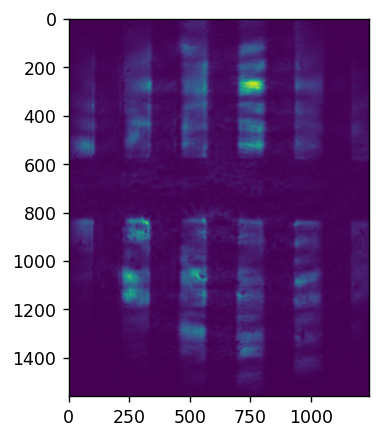

In [18]:
plt.imshow(im)

## Analysis of measurements

Now let's analyze the data.

[[780. 620.]
 [776. 621.]
 [771. 624.]
 [771. 630.]
 [776. 621.]
 [771. 624.]
 [771. 630.]
 [773. 635.]]
The centroid position (usimg M=0 A=0) as reference is:
  - Average:   x = 773.6 pix.;   y = 625.6 pix.
  - Error:     x = 3.2 pix.;   y = 5.1 pix.
  0   1   1   1   2   2   2   3   3   3   4   4   4   5   5   5   6   6   6   7   7   7   8   8   8   9   9   9  10  10  10  11  11  11  12  12  13  13  13  14  14  14  15  15  15  16  16  16  17  17  17  18  18  18  19  19  19  20  20  20  21  21  21  22  22  22  23  23  23  24  24  25  26  26  26  27  27  27  28  28  28  29  29  29  30  30  30  31  31  31  32  32  32  33  33  33  34  34  34  35  35  35  36  36  36  37  37  38  38  38  39  39  39  40  40  40  41  41  41  42  42  42  43  43  43  44  44  44  45  45  45  46  46  46  47  47  47  48  48  48  49  49  50  51  51  51  52  52  52  53  53  53  54  54  54  55  55  55  56  56  56  57  57  57  58  58  58  59  59  59  60  60  60  61  61  61  62  62  63  63  63  64  64  64  65  65  65

2022-07-20 18:10:08,513 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


100 %


2022-07-20 18:10:08,832 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100 %


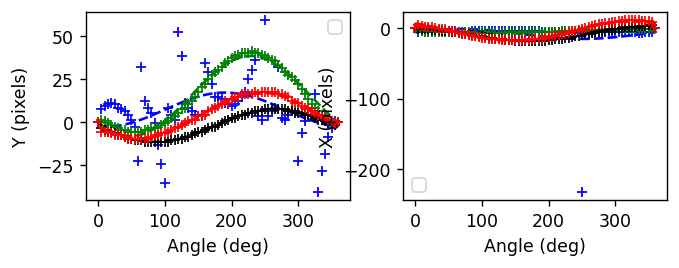

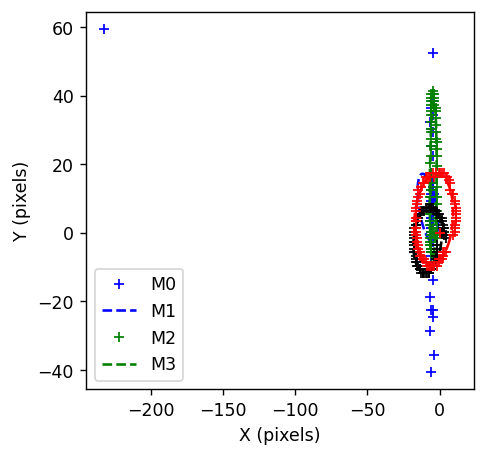

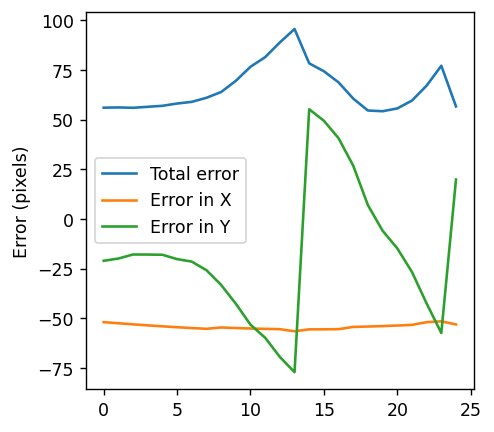

In [24]:
Analyze_Motor_Drift(Nangles=73, Nrandom=25)

## End of measurements

Close the polarimeter.

In [39]:
pol.Close()

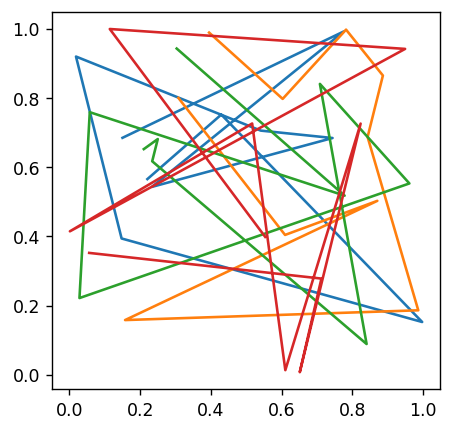

In [55]:
plt.plot(np.random.rand(10,4), np.random.rand(10,4))